**Task-01**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset with correct file path
try:
    df = pd.read_csv(r'D:\JAPANESE-IT-PROGRAM\Class_7\house_data.csv')  # Use raw string
except FileNotFoundError:
    raise FileNotFoundError("Error: The file 'house_data.csv' was not found. Please check the file path.")

# Display basic dataset info
print("Dataset Info:")
print(df.info())  # Check data types and missing values

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns BEFORE encoding: {non_numeric_columns}")

# Convert categorical columns to numerical using one-hot encoding
if non_numeric_columns:
    df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Handle missing values
df = df.dropna()

# Define features (X) and target variable (y)
if 'price' not in df.columns:
    raise KeyError("Error: The dataset does not contain a 'price' column. Please check the CSV file.")

X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Debug: Check if any non-numeric columns remain
non_numeric_remaining = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_remaining:
    print("\n Non-numeric columns detected AFTER encoding:", non_numeric_remaining)
    print(X[non_numeric_remaining].head())  # Print first few rows
    raise ValueError("Error: Some feature columns are still non-numeric. Check data preprocessing.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (Scaling for better model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nModel Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

# Visualizing Feature Importance
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
feature_importance.plot(kind='bar')
plt.title("Feature Importance in Linear Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22570 entries, 0 to 22569
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   build_year                                22570 non-null  int64  
 1   lat                                       22570 non-null  float64
 2   living_area                               22570 non-null  float64
 3   long                                      22570 non-null  float64
 4   municipality_name                         22570 non-null  object 
 5   zipcode                                   22570 non-null  int64  
 6   num_rooms                                 22570 non-null  float64
 7   object_type_name                          22570 non-null  object 
 8   price                                     22570 non-null  float64
 9   water_percentage_1000                     22570 non-null  float64
 10  travel_time_private_

ValueError: Error: Some feature columns are still non-numeric. Check data preprocessing.

**Task-02:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = '/content/sample_data/salary_data.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    raise FileNotFoundError(f"Error: The file '{file_path}' was not found. Please check the file path.")


# Handle missing values
if df.isnull().sum().any():
    df.dropna(inplace=True)  # Remove rows with missing values
    print("Missing values handled.")

# Identify categorical columns
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

# Apply one-hot encoding only if categorical columns exist
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)
    print("Categorical encoding applied.")

# Define features and target variable
X = df.drop(columns=['Salary'])  # Features (all except 'Salary')
y = df['Salary']  # Target variable

# Ensure all feature columns are numeric
if not all(np.issubdtype(dtype, np.number) for dtype in X.dtypes):
    raise ValueError("Error: Some feature columns are still non-numeric after preprocessing.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

# Example prediction using the first test sample
sample_input = X_test.iloc[[0]]  # Keeping feature names
predicted_salary = model.predict(sample_input)
print(f'Predicted Salary for sample input: {predicted_salary[0]:.2f}')


Dataset loaded successfully!
Model Evaluation:
MSE: 49830096.86, R-squared: 0.90
Predicted Salary for sample input: 115790.21


**Task-03**

Model Evaluation:
MSE: 291.18, R-squared: 0.81


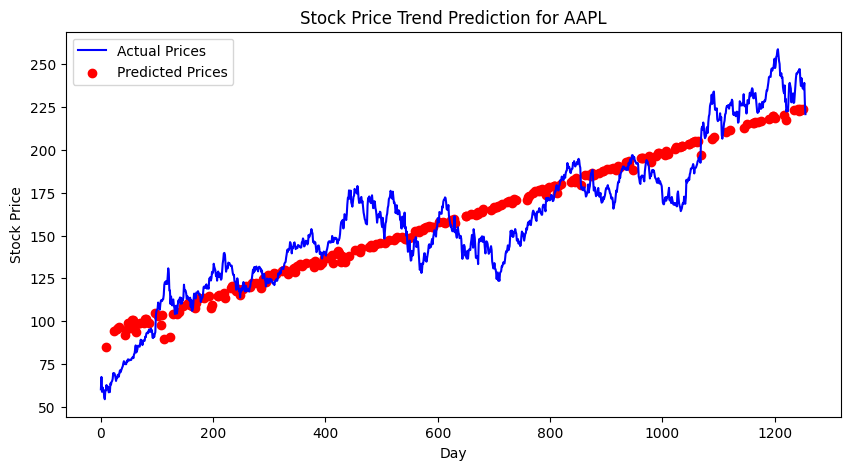

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to fetch stock data
def get_stock_data(ticker):
    try:
        stock = yf.Ticker(ticker)
        df = stock.history(period='5y')  # Fetch last 5 years of stock data
        if df.empty:
            raise ValueError(f"Error: No data found for ticker '{ticker}'.")
        df = df[['Close', 'Volume']].dropna()  # Keep only necessary columns
        df['Day'] = np.arange(len(df))  # Create a numerical index for days
        return df
    except Exception as e:
        raise ValueError(f"Error fetching stock data: {e}")

# Load dataset
ticker = 'AAPL'  # Default stock symbol (change as needed)
df = get_stock_data(ticker)

# Define features and target variable
X = df[['Day', 'Volume']]
y = df['Close']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

# Visualization of actual vs predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(df['Day'], df['Close'], label='Actual Prices', color='blue')
plt.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Trend Prediction for {ticker}')
plt.legend()
plt.show()


**Task-04**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = '/content/sample_data/customer_churn_data.csv'  # Ensure the file is uploaded in Colab

try:
    df = pd.read_csv(r'D:\JAPANESE-IT-PROGRAM\Class_7\house_data.csv') 
    print("Dataset loaded successfully!")
except FileNotFoundError:
    raise FileNotFoundError(f"Error: The file '{file_path}' was not found. Please upload it to Colab.")

# Check if required columns exist
required_columns = {'international_plan', 'voice_mail_plan', 'churn', 'total_calls', 'total_charge'}
missing_columns = required_columns - set(df.columns)

if missing_columns:
    raise ValueError(f"Error: Missing columns in dataset: {missing_columns}")

# Handle missing values
if df.isnull().sum().any():
    df.dropna(inplace=True)  # Remove rows with missing values
    print("Missing values handled.")

# Convert 'churn' column to integers (0 for No, 1 for Yes)
df['churn'] = df['churn'].astype(str).str.strip().map({'False': 0, 'True': 1})

# Convert categorical columns to numerical
categorical_cols = ['international_plan', 'voice_mail_plan']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Categorical encoding applied.")

# Define features (X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Ensure all feature columns are numeric
if not all(np.issubdtype(dtype, np.number) for dtype in X.dtypes):
    raise ValueError("Error: Some feature columns are still non-numeric after preprocessing.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}\n')
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Customer Churn Prediction')
plt.show()


**Task-05**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset correctly
file_path = r'D:\JAPANESE-IT-PROGRAM\Class_7\owid-energy-data.csv'

try:
    df = pd.read_csv(file_path)  # Ensure the file path is correct
    print(" Dataset loaded successfully!")
except FileNotFoundError:
    raise FileNotFoundError(f" Error: The file '{file_path}' was not found. Please check the file path.")

# Display basic dataset information
print("\n🔹 Dataset Info:")
print(df.info())

# Display column names to identify relevant features
print("\n🔹 Dataset Columns:")
print(df.columns.tolist())

# Identify the correct column for energy consumption
energy_columns = [col for col in df.columns if "consumption" in col.lower()]
if not energy_columns:
    raise KeyError(" No column related to energy consumption found in the dataset.")
else:
    print("\n Energy-related columns found:", energy_columns)

# Use the first identified energy consumption column
energy_column = energy_columns[0]
print(f"\n🔹 Using '{energy_column}' as the target variable.")

# Handle missing values
df.dropna(inplace=True)

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("\nCategorical encoding applied.")

# Define features (X) and target variable (y)
X = df.drop(columns=[energy_column])
y = df[energy_column]

# Ensure all feature columns are numeric
non_numeric_remaining = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_remaining:
    print("\n Non-numeric columns detected:", non_numeric_remaining)
    print(X[non_numeric_remaining].head())
    raise ValueError("Some feature columns are still non-numeric. Check data preprocessing.")

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\n Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

# Visualization: Actual vs Predicted Energy Consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Ideal fit line
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Energy Consumption Prediction')
plt.legend()
plt.show()
